# **Data Unveiled: NYC Airbnb**

Loading necessary library

In [31]:
# Loading necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

## **Data Collection**

Loading and previewing data

In [32]:
# Load and preview data
ab_ny = pd.read_csv("AB_NYC_2019.csv")
ab_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
ab_ny.describe()

After loading the data, we used describe to get a summary statistics of the numeric data.

In [ ]:
#Information about the variables present in the dataset
ab_ny.info()

## **Data Preprocessing**

Missing Values

In [ ]:
# Counting the number of missing values in each column
null_counts = ab_ny.isnull().sum()

# Printing the number of missing values in each column
print("Number of null values in each column:")
print(null_counts)

Null values are present in name, host_name, last_review, reviews_per_month.

Null and Non-Null Values in each column

In [ ]:
# Calculating the total number of rows in the dataset
total_rows = len(ab_ny)

# Calculating the number of non-null values in each column
non_null_counts = total_rows - null_counts

# Printing the number of null and non-null values in each column
print("Number of null values vs non-null values in each column:")
print(pd.DataFrame({'NonNull': non_null_counts, 'Null': null_counts}))

### **Correlation Matrix**

Correlation matrix is to understand how and which features are interrelated with each other in this data.

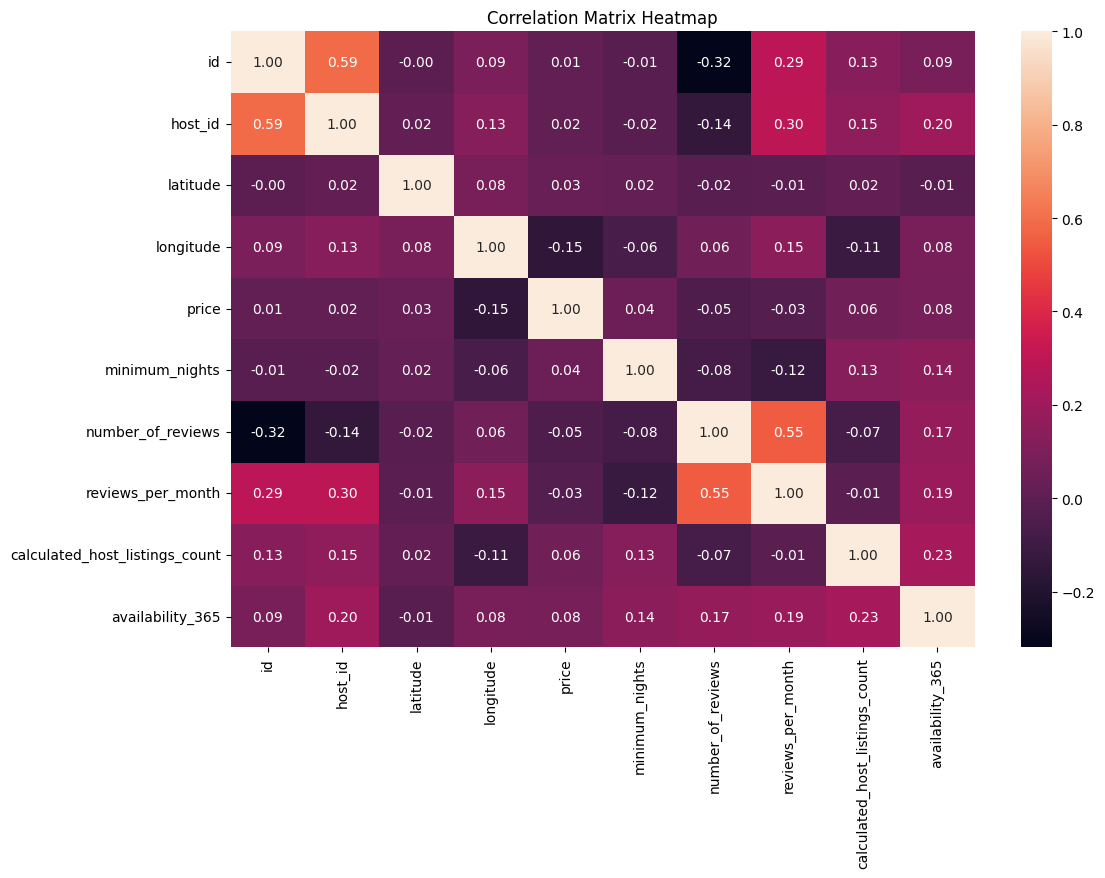

In [43]:
numeric_cols = ab_ny.select_dtypes(include=[np.number]).columns.tolist()
ab_ny_numeric = ab_ny[numeric_cols]
corr_matrix = ab_ny_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Insights:

* The above Heatmap it can be concluded that there is a moderate correlation between id and host_id, number_of_reviews and reviews_per_month.

* There is no high correlation between other variables.

### **Handling Null Values**

In [44]:
host_number= ab_ny['host_name'].nunique()
print(f'Number of hosts in New York City: {host_number}')

listings_num= ab_ny['name'].nunique()
print(f'Number of listings in New York City: {listings_num}')

Number of hosts in New York City: 11452
Number of listings in New York City: 47905


'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts. So, these missing values can be filled with "unknown" & "noname" respectively.

In [45]:
ab_ny['name'].fillna('unknown',inplace=True)
ab_ny['host_name'].fillna('noname',inplace=True)

In [46]:
#Checking  null values in name and host_name columns
ab_ny[['host_name','name']].isnull().values.any()

False

Based on the correlation matrix that we can use number_of_reviews instead of reviews_per_month. So, we can impute the missing values in 'reviews_per_month' with 0

In [47]:
# Imputing missing values in numerical column 'reviews_per_month' with 0
numerical_cols = ['reviews_per_month']
for col in numerical_cols:
    ab_ny[col].fillna(0, inplace=True)

In [48]:
ab_ny=ab_ny.drop(['last_review'],axis=1)

Checking for null values

In [49]:
# Counting the number of missing values in each column
after_null_count= ab_ny.isnull().sum()

# Printing the number of missing values in each column
print("Number of null values in each column after Handling:")
print(after_null_count)

Number of null values in each column after Handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [50]:
ab_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

Summary statistics for numerical columns

In [51]:
## Summary statistics for numerical columns
sum_stats = ab_ny.describe()
print(sum_stats)

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.00

### **Duplicate Values**

displaying duplicate values

In [52]:
dup_data_ny = ab_ny.duplicated()
print(dup_data_ny.sum())
ab_ny[dup_data_ny]

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


There are no duplicate values in the dataset.

### **Unique Values**

Displaying Unique values

In [53]:
# Unique values for categorical columns
cat_cols = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
for col in cat_cols:
    print(f"Unique values for {col}:")
    print(ab_ny[col].value_counts())
    print()

Unique values for name:
name
Hillside Hotel                                        18
Home away from home                                   17
unknown                                               16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47906, dtype: int64

Unique values for host_name:
host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel

## **Data Exploration**

### **Outliers**

Predicting Prices in the dataset

<ipython-input-54-1ac5a475c1fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ab_ny['price'],hist=True)


<Axes: xlabel='price', ylabel='Density'>

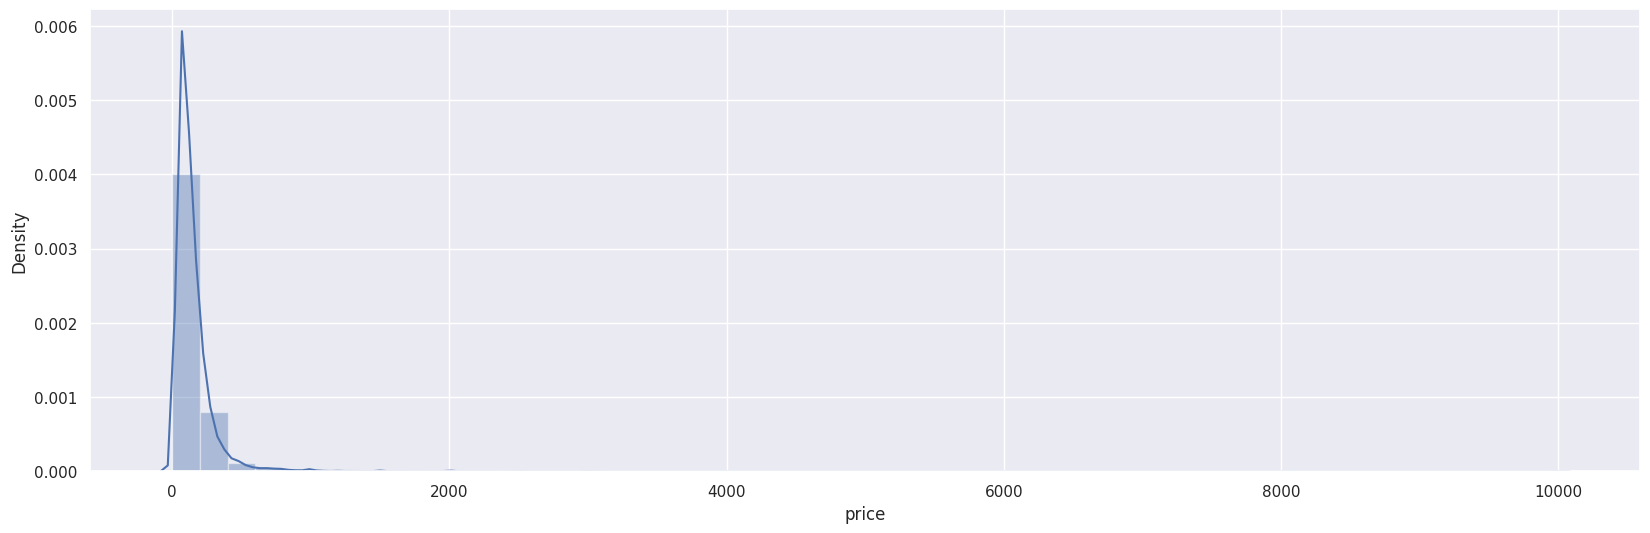

In [54]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(ab_ny['price'],hist=True)

Insights:
* It is a positive skewed distribution also it does not deviate much from normal distribution.

In [55]:
#skewness and kurtosis
print("Skewness: %f" % ab_ny['price'].skew())
print("Kurtosis: %f" % ab_ny['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


Insights:

* The skewness and kurtosis values came out very large.
* Skewness value >1 so it is highly skewed.
* Kurtosis looks high as well which indicates presence of good amount of outliers.

<Axes: ylabel='price'>

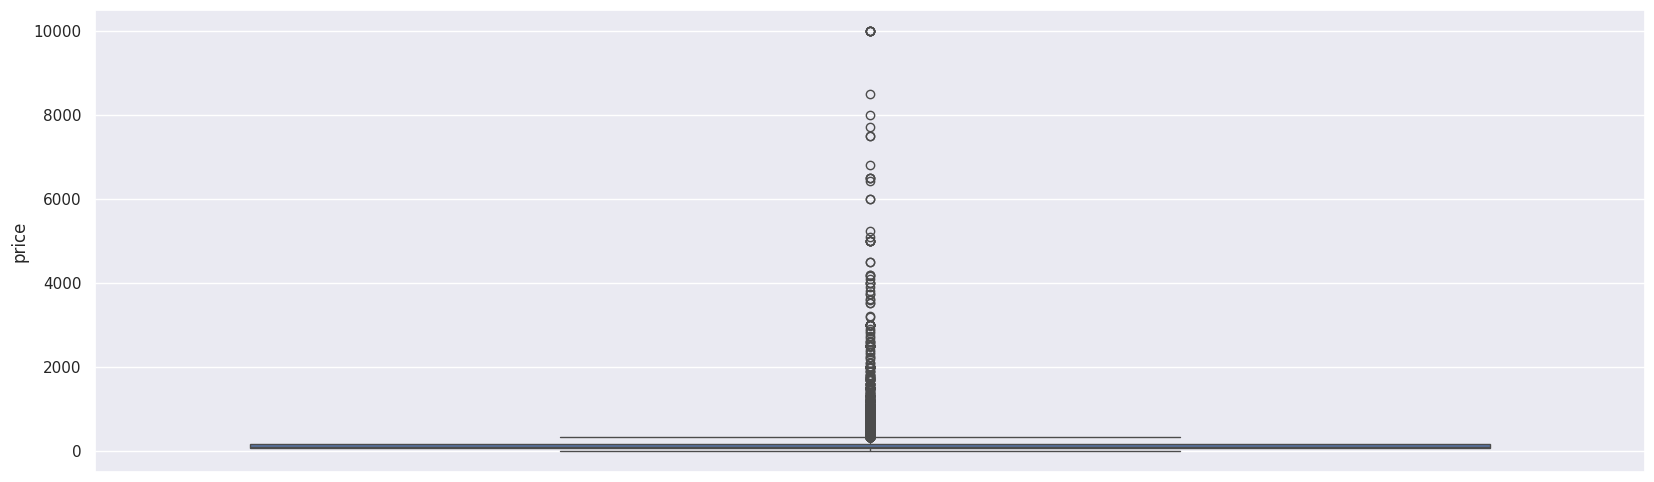

In [56]:
sns.boxplot(ab_ny['price'])

<Axes: ylabel='minimum_nights'>

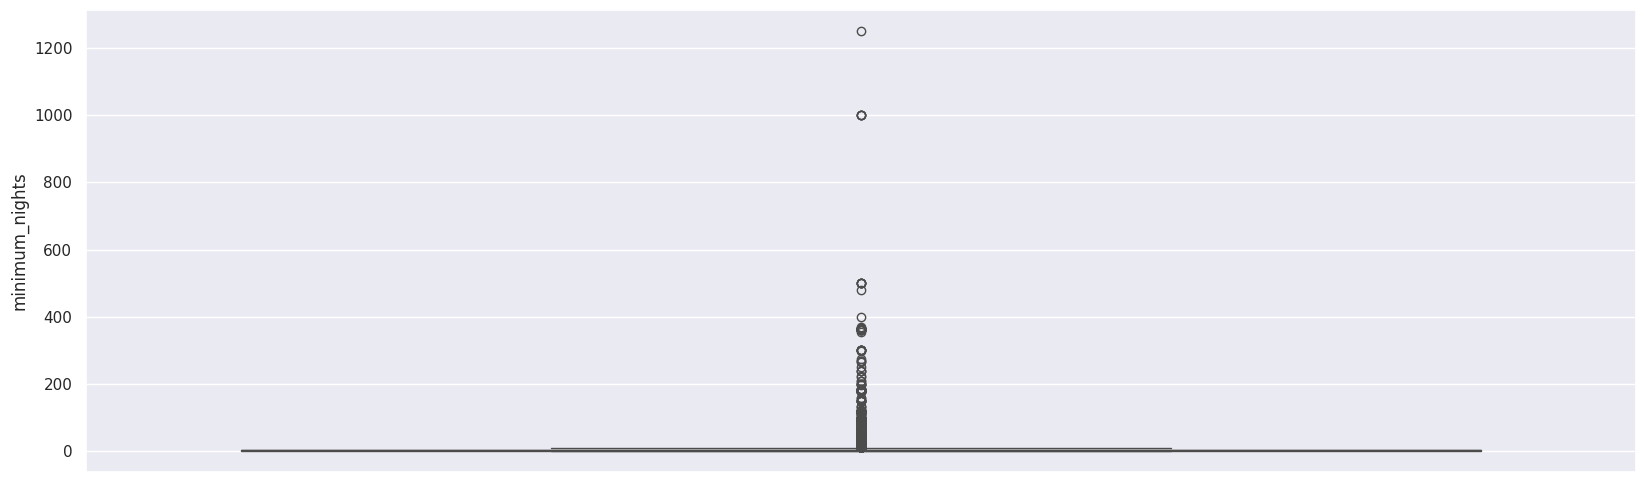

In [57]:
sns.boxplot(ab_ny['minimum_nights'])

<Axes: xlabel='minimum_nights', ylabel='price'>

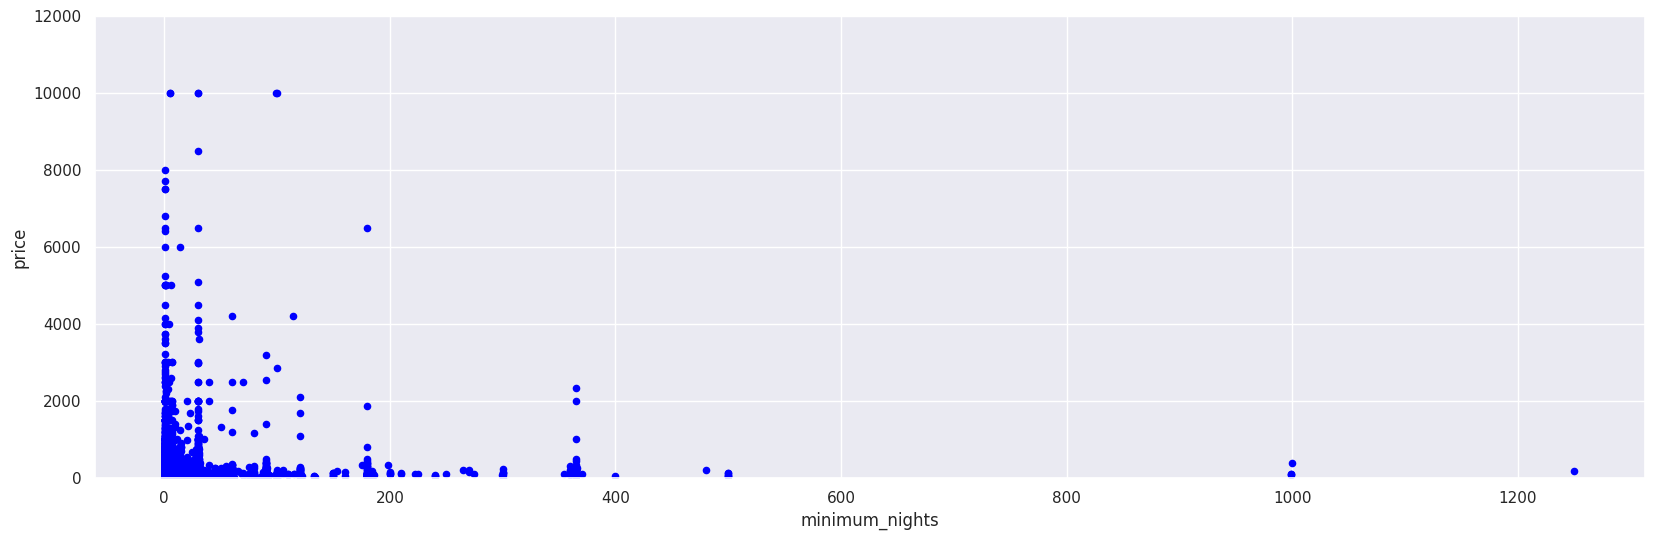

In [58]:
# plotting for a relation between price vs minimum_nights
var='minimum_nights'
data=pd.concat([ab_ny['price'],ab_ny[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000),color='blue')

Insights:
* Many data points are clustured on 0 price range.
* Only a few have minimum nights for stay but price is zero which is like anomaly in price.
* Outliers also exists as shown in the above price vs minimum nights.

### **Handling Outliers**

To remove outliers Zscore is being used. Calculating Zscore for price and minimum nights.

In [59]:
## Calculating Zscore for price and minimum nights
from scipy import stats

ab_ny['z_price'] = np.abs(stats.zscore(ab_ny['price']))
ab_ny['z_min_nights'] = np.abs(stats.zscore(ab_ny['minimum_nights']))

In [60]:
ab_ny['z_price'].min()

0.001163068164755268

In [61]:
ab_ny['z_min_nights'].min()

0.0014608321522337887

<Axes: ylabel='z_min_nights'>

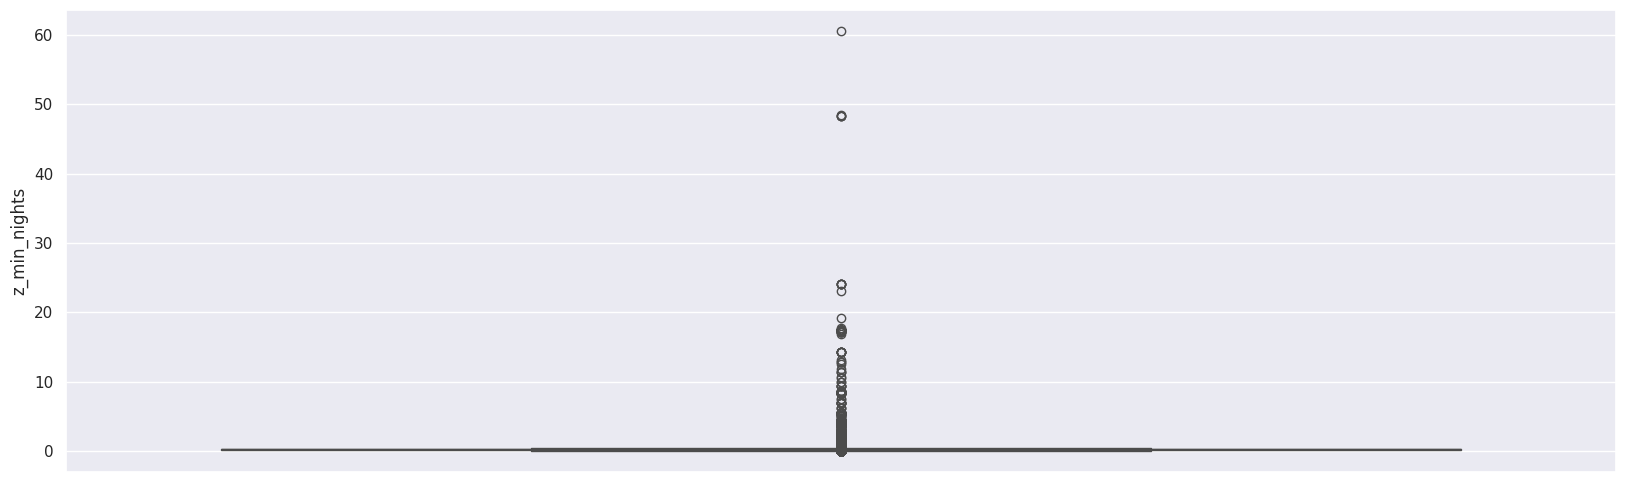

In [62]:
sns.boxplot(ab_ny['z_min_nights'])

* Defining an outlier threshold value as 3.
* Using Gaussian Distribution approach, 99.7% of data lies between +/- 3 SD
* The outliers are handled by removing ZScores greater than 3

In [63]:
airbnb_ny_final = ab_ny[(ab_ny['z_price'] < 3)]
airbnb_ny_final = airbnb_ny_final[(airbnb_ny_final['price'] > 3)]
airbnb_ny_final = airbnb_ny_final[(ab_ny['z_min_nights'] < 3)]

<ipython-input-63-a427354f66d3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airbnb_ny_final = airbnb_ny_final[(ab_ny['z_min_nights'] < 3)]


<ipython-input-64-89810e0409f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ab_ny['number_of_reviews'],hist=True)


<Axes: xlabel='number_of_reviews', ylabel='Density'>

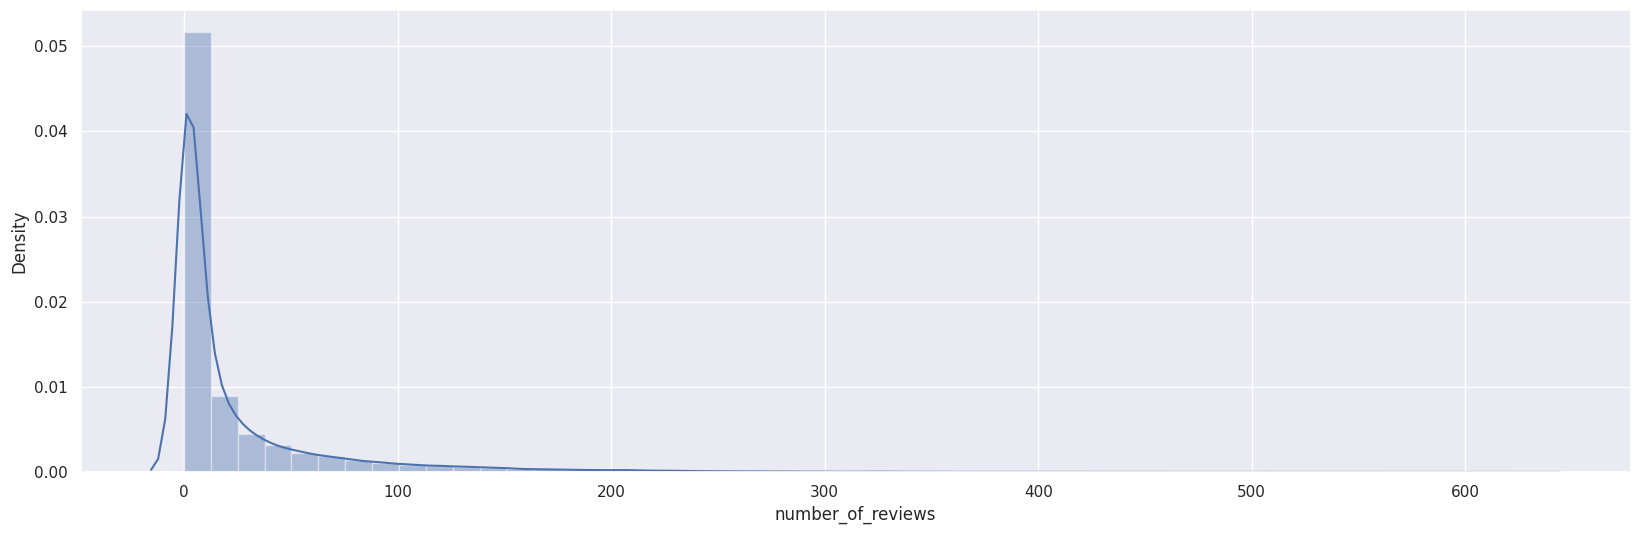

In [64]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(ab_ny['number_of_reviews'],hist=True)

In [65]:
#skewness and kurtosis
print("Skewness: %f" % ab_ny['number_of_reviews'].skew())
print("Kurtosis: %f" % ab_ny['number_of_reviews'].kurt())

Skewness: 3.690635
Kurtosis: 19.529788


<ipython-input-66-4dcb0bbb98ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ab_ny['calculated_host_listings_count'],hist=True)


<Axes: xlabel='calculated_host_listings_count', ylabel='Density'>

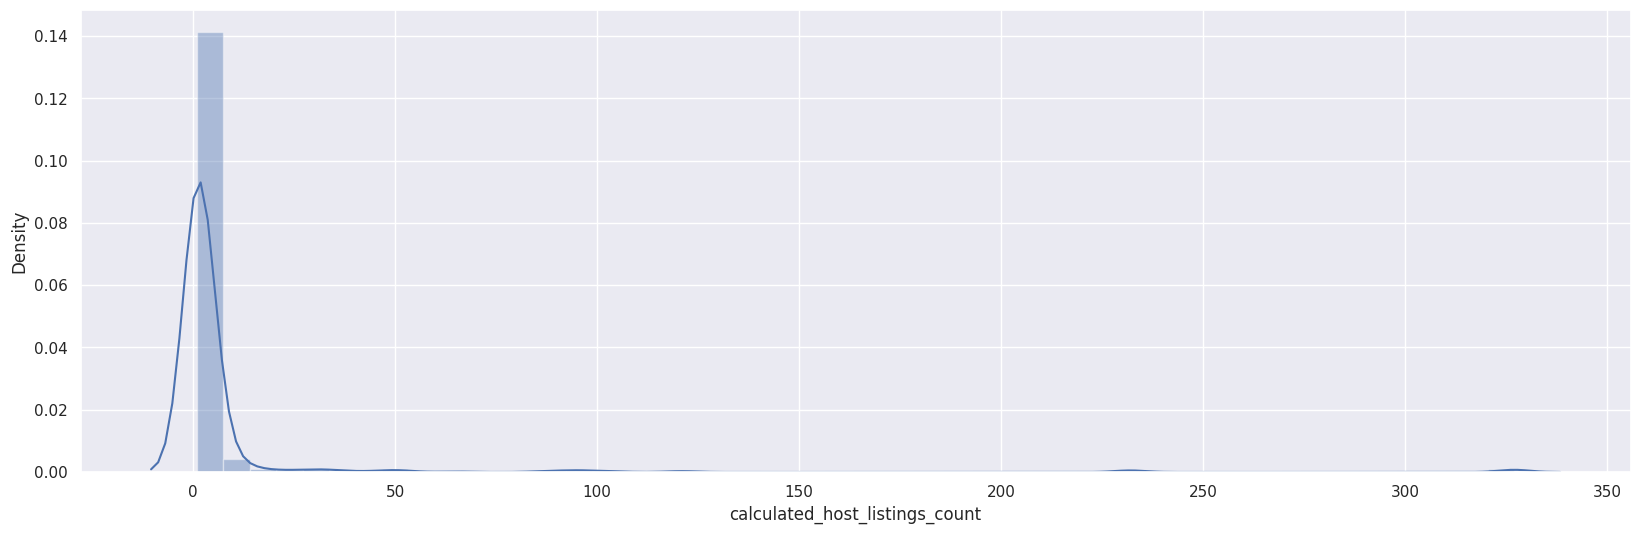

In [66]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(ab_ny['calculated_host_listings_count'],hist=True)

In [67]:
#skewness and kurtosis
print("Skewness: %f" % ab_ny['calculated_host_listings_count'].skew())
print("Kurtosis: %f" % ab_ny['calculated_host_listings_count'].kurt())

Skewness: 7.933174
Kurtosis: 67.550888


In [68]:
# convert numeric variables into categorical variables

airbnb_ny_final['minimum_nights_group'] = 'Others'
airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 1] = 'one night'
airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 2] = 'two nights'
airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 3] = 'three nights'
airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 4] = 'four nights'
airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] > 4] = 'five nights or more'

airbnb_ny_final['calculated_host_listings_count_group'] = 'Others'
airbnb_ny_final['calculated_host_listings_count_group'][airbnb_ny_final['calculated_host_listings_count'] == 1] = 'one listing'
airbnb_ny_final['calculated_host_listings_count_group'][airbnb_ny_final['calculated_host_listings_count'] == 2] = 'two listings'
airbnb_ny_final['calculated_host_listings_count_group'][airbnb_ny_final['calculated_host_listings_count'] > 2] = 'more than two listings'


<ipython-input-68-b40f6c8815e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 1] = 'one night'
<ipython-input-68-b40f6c8815e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_ny_final['minimum_nights_group'][airbnb_ny_final['minimum_nights'] == 2] = 'two nights'
<ipython-input-68-b40f6c8815e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_

In [69]:
airbnb_ny_final.groupby('calculated_host_listings_count_group').size()

calculated_host_listings_count_group
more than two listings     9776
one listing               31819
two listings               6591
dtype: int64

In [70]:
airbnb_ny_final.groupby('minimum_nights_group').size()

minimum_nights_group
five nights or more    12753
four nights             3281
one night              12568
three nights            7952
two nights             11632
dtype: int64

In [71]:
airbnb_ny_final

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,z_price,z_min_nights,minimum_nights_group,calculated_host_listings_count_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0.015493,0.293996,one night,more than two listings
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0.300974,0.293996,one night,two listings
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0.011329,0.196484,three nights,one listing
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0.265335,0.293996,one night,one listing
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0.302811,0.144807,five nights or more,one listing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,0.344452,0.245240,two nights,two listings
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,0.469373,0.147729,four nights,two listings
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,0.157070,0.144807,five nights or more,one listing
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,0.406912,0.293996,one night,more than two listings


In [72]:
airbnb_ny_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48186 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    48186 non-null  int64  
 1   name                                  48186 non-null  object 
 2   host_id                               48186 non-null  int64  
 3   host_name                             48186 non-null  object 
 4   neighbourhood_group                   48186 non-null  object 
 5   neighbourhood                         48186 non-null  object 
 6   latitude                              48186 non-null  float64
 7   longitude                             48186 non-null  float64
 8   room_type                             48186 non-null  object 
 9   price                                 48186 non-null  int64  
 10  minimum_nights                        48186 non-null  int64  
 11  number_of_reviews   

In [73]:
print('Min Price: ', ab_ny['price'].min(), '| Max Price: ', ab_ny['price'].max())

Min Price:  0 | Max Price:  10000


In [74]:
print('Min Price: ', airbnb_ny_final['price'].min(), '| Max Price: ', airbnb_ny_final['price'].max())

Min Price:  10 | Max Price:  860


Using zscore rows with Minimum price as 0 are removed and are changed to 10

### **Final Dataset for Data Visualization**


Getting final data for EDA and Visualization clean the dataset by removing intermediate columns.

In [75]:
# remove unused columns
airbnb_ny_final.drop(['z_price','z_min_nights','minimum_nights','calculated_host_listings_count'],
                     axis = 1,inplace=True)
airbnb_ny_final.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,availability_365,minimum_nights_group,calculated_host_listings_count_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,365,one night,more than two listings
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,355,one night,two listings
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,0.00,365,three nights,one listing
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270,4.64,194,one night,one listing
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0.10,0,five nights or more,one listing


In [76]:
airbnb_ny_final.describe()

,id,host_id,latitude,longitude,price,number_of_reviews,reviews_per_month,availability_365
count,4.818600e+04,4.818600e+04,48186.000000,48186.000000,48186.000000,48186.000000,48186.000000,48186.000000
mean,1.903416e+07,6.772591e+07,40.728860,-73.951902,138.780932,23.476570,1.101470,111.654505
std,1.096926e+07,7.863425e+07,0.054605,0.046211,107.583370,44.736442,1.603406,131.070387
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,0.000000,0.000000,0.000000
25%,9.487544e+06,7.853731e+06,40.689930,-73.982830,69.000000,1.000000,0.040000,0.000000
50%,1.969891e+07,3.098576e+07,40.722900,-73.955490,105.000000,5.000000,0.380000,43.000000
75%,2.913431e+07,1.074344e+08,40.763130,-73.935923,175.000000,24.000000,1.610000,223.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,860.000000,629.000000,58.500000,365.000000


In [77]:
airbnb_ny_final.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,availability_365,minimum_nights_group,calculated_host_listings_count_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9,0.21,365,one night,more than two listings
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45,0.38,355,one night,two listings
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0,0.00,365,three nights,one listing
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270,4.64,194,one night,one listing
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9,0.10,0,five nights or more,one listing


Final dataset after handling outliers

<ipython-input-78-e41b0fe93ff3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_ny_final['price'])


<Axes: xlabel='price', ylabel='Density'>

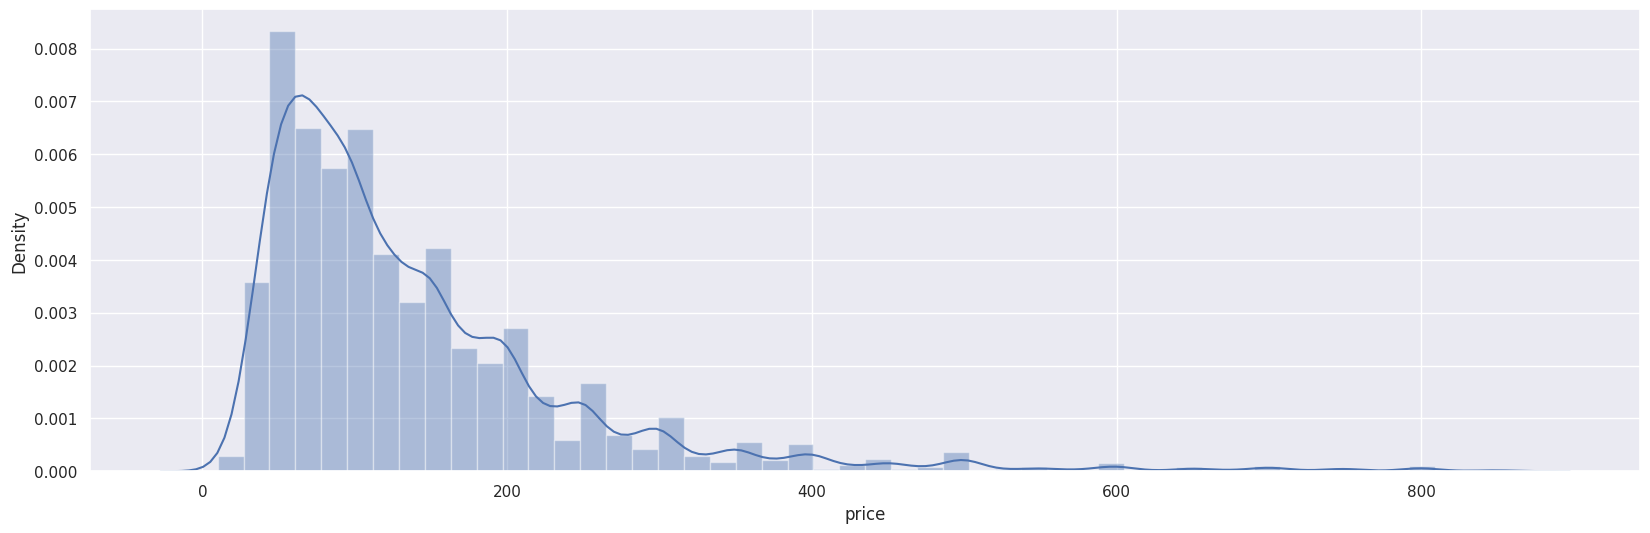

In [78]:
sns.distplot(airbnb_ny_final['price'])

Skewness and Kurtosis values after handling Outliers

In [79]:
print("Skewness: %f" % airbnb_ny_final['price'].skew())
print("Kurtosis: %f" % airbnb_ny_final['price'].kurt())

Skewness: 2.452174
Kurtosis: 8.648268


In [80]:
airbnb_ny_final['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21200
Brooklyn         19906
Queens            5635
Bronx             1076
Staten Island      369
Name: count, dtype: int64

## **Data Visualization**

### **Price Distribution by Room Type in NYC Airbnb Listings**

<ipython-input-81-cd2f330e09fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=airbnb_ny_final, x='room_type', y='price', palette='Set3')


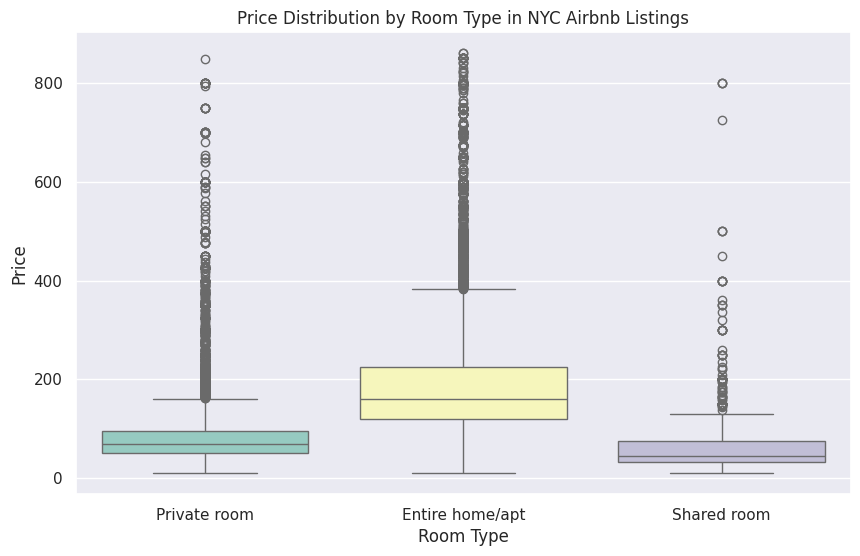

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_ny_final, x='room_type', y='price', palette='Set3')
plt.title('Price Distribution by Room Type in NYC Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### **Exploring Price and Review Relationships in NYC Airbnb**

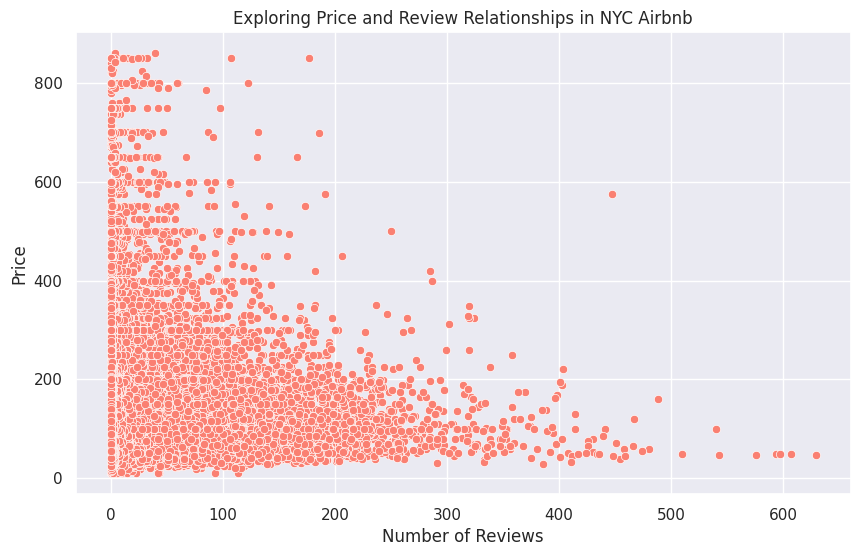

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_ny_final, x='number_of_reviews', y='price', color='salmon')
plt.title('Exploring Price and Review Relationships in NYC Airbnb')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

Insights:
* There is a positive correlation between the number of reviews and the price of Airbnb listings in New York City.
* Listings with more reviews have a longer track record of success, which means that hosts can charge more for them.
* The relationship between the number of reviews and price is not linear. This means that the price of a listing does not increase proportionally to the number of reviews it has.
* There are a few outliers in the data. These are listings that have a very high or low price compared to the number of reviews they have. These outliers could be due to a variety of factors.

### **Top 10 Neighborhoods in NYC Airbnb**

In [83]:
#Top 10 Neighbourhoods
airbnb_ny_final.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3881
Bedford-Stuyvesant    3681
Harlem                2635
Bushwick              2447
Hell's Kitchen        1937
Upper West Side       1917
East Village          1827
Upper East Side       1770
Crown Heights         1553
Midtown               1494
Name: count, dtype: int64

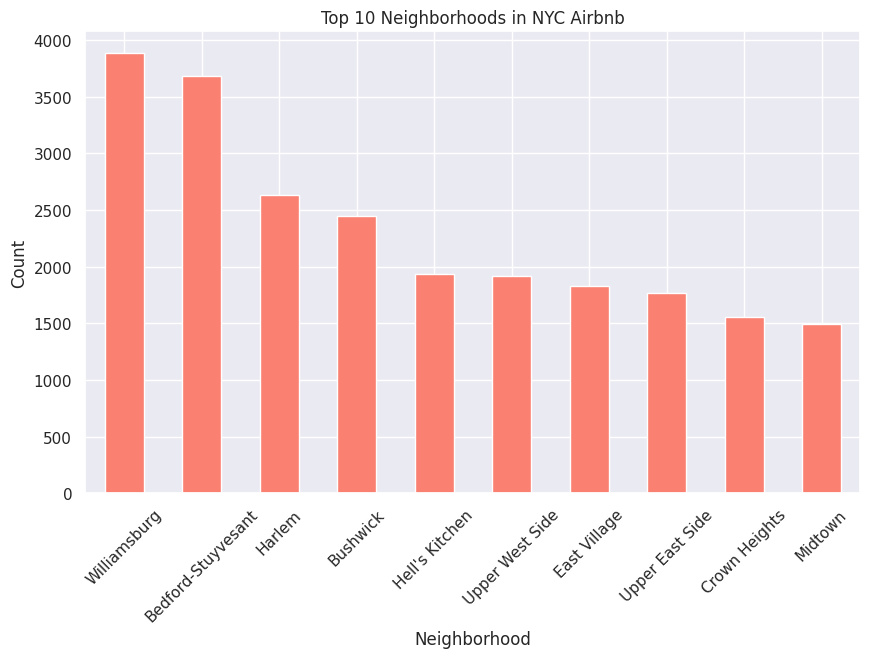

In [84]:
# Calculating the top 10 neighborhoods
top_neigh = airbnb_ny_final['neighbourhood'].value_counts().head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
top_neigh.plot(kind='bar', color='salmon')
plt.title('Top 10 Neighborhoods in NYC Airbnb')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

combining this with top boroughs and room types gives Top neighbourhoods with category of room type

<Figure size 1500x600 with 0 Axes>

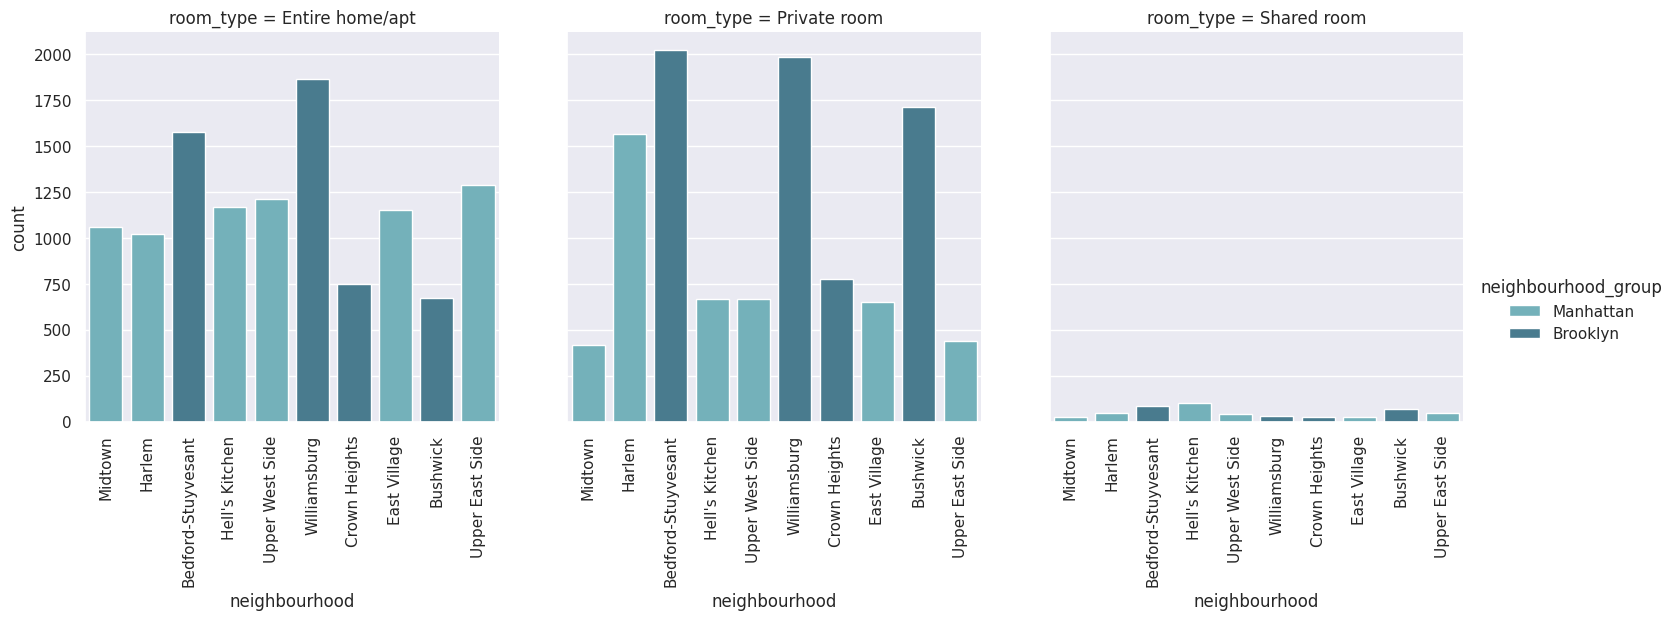

In [86]:
# Get top 10 neighborhoods
top_neigh = airbnb_ny_final['neighbourhood'].value_counts().head(10).index.tolist()

# Filter data for top neighborhoods
filtered_data = airbnb_ny_final[airbnb_ny_final['neighbourhood'].isin(top_neigh)]

# Plot catplot
plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type',
                    data=filtered_data, kind='count', palette='GnBu_d')
vis_3.set_xticklabels(rotation=90)

# Show plot
plt.show()

In [87]:
T10_review_list= airbnb_ny_final.nlargest(10,'number_of_reviews')
T10_review_list[['name','number_of_reviews','neighbourhood_group']]

,name,number_of_reviews,neighbourhood_group
11759,Room near JFK Queen Bed,629,Queens
2031,Great Bedroom in Manhattan,607,Manhattan
2030,Beautiful Bedroom in Manhattan,597,Manhattan
2015,Private Bedroom in Manhattan,594,Manhattan
13495,Room Near JFK Twin Beds,576,Queens
10623,Steps away from Laguardia airport,543,Queens
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540,Manhattan
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,510,Queens
4870,Private brownstone studio Brooklyn,488,Brooklyn
471,LG Private Room/Family Friendly,480,Brooklyn


### **Average Price by Room Type and Neighbourhood**

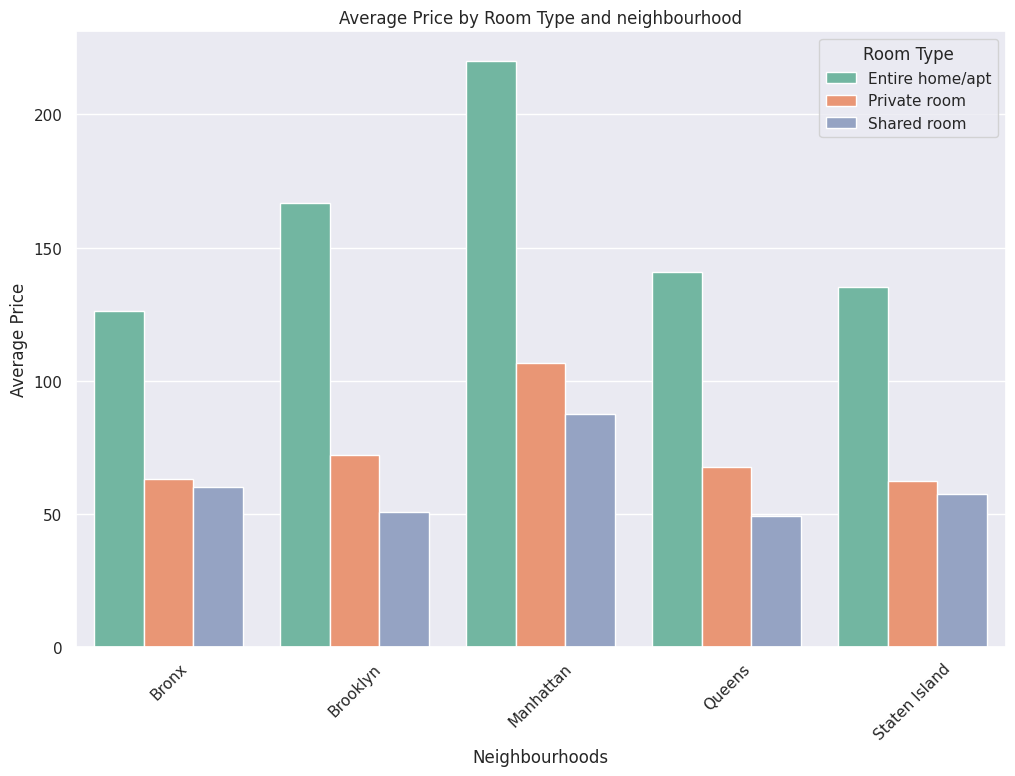

In [88]:
# Calculate the average price for each room type in each neighbourhood_group
average_prices = airbnb_ny_final.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=average_prices, palette='Set2')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type and neighbourhood')
plt.legend(title='Room Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### **Distribution of type of rooms across NYC**

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

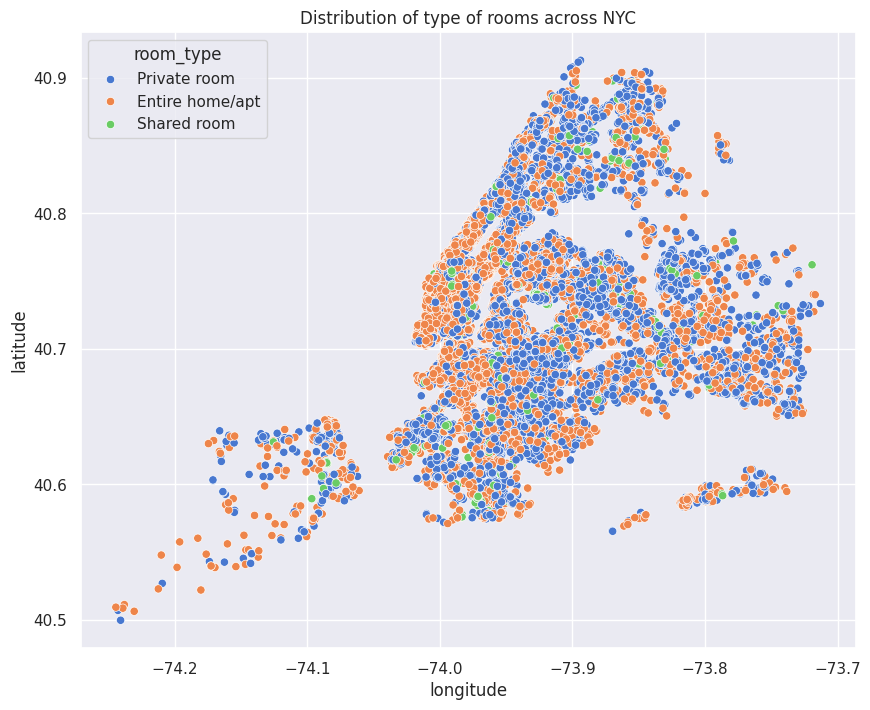

In [89]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=airbnb_ny_final.longitude, y=airbnb_ny_final.latitude,hue=airbnb_ny_final.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

### **Availability of Rooms in NYC Airbnb**

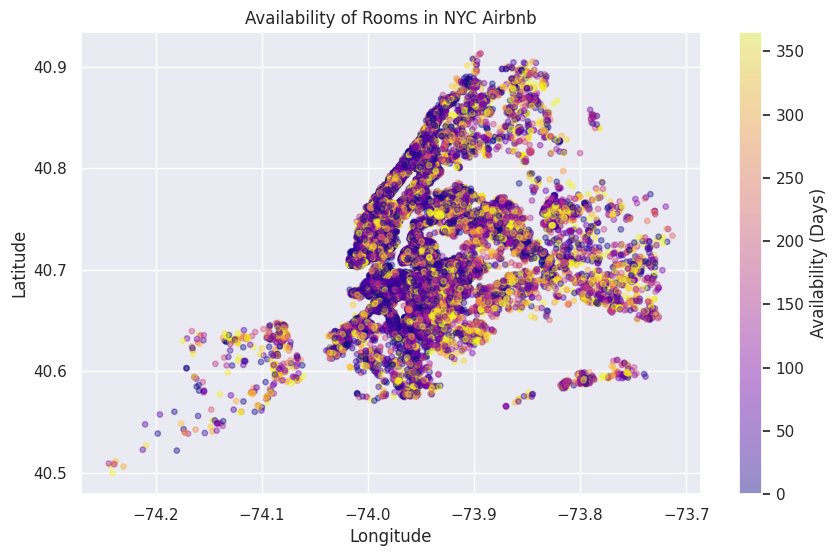

In [90]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(airbnb_ny_final['longitude'], airbnb_ny_final['latitude'], c=airbnb_ny_final['availability_365'], cmap='plasma', alpha=0.4,s=15)
plt.colorbar(scatter, label='Availability (Days)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Availability of Rooms in NYC Airbnb')
plt.show()

### **Distribution of Room Types**

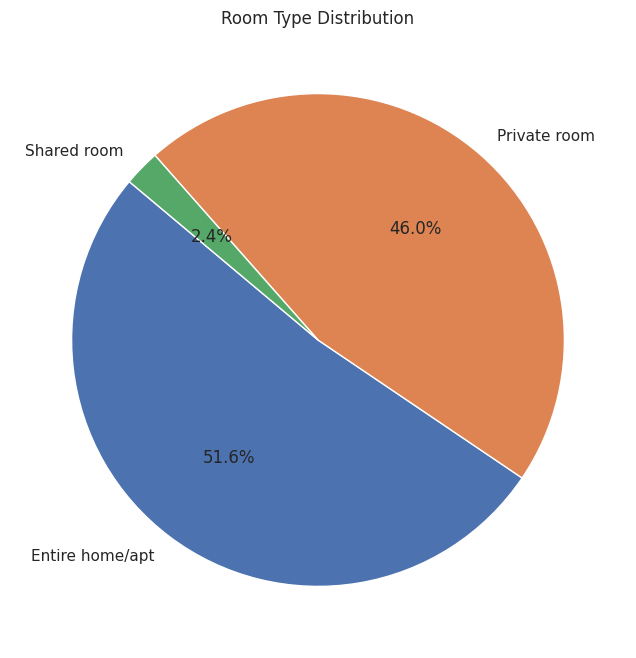

In [91]:
plt.figure(figsize=(8, 8))
airbnb_ny_final['room_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution')
plt.ylabel('')
plt.show()

### **Average Price by Neighborhood in NYC**

<ipython-input-92-abc003cbc9c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='inferno')


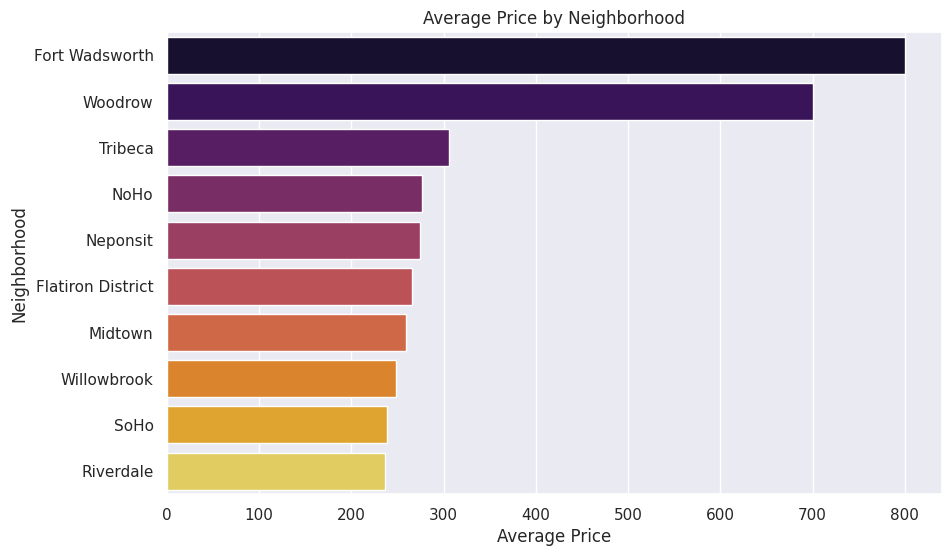

In [92]:
plt.figure(figsize=(10, 6))
avg_price_neighborhood = airbnb_ny_final.groupby('neighbourhood')['price'].mean().nlargest(10)
sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='inferno')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

### **Top 10 hosts based on number of listings in NYC**

In [93]:
#top 10 hosts on the basis of no of listings in entire NYC!
T10_hosts=airbnb_ny_final['host_name'].value_counts()[:10]
T10_hosts

host_name
Michael         394
David           393
Sonder (NYC)    327
John            289
Alex            276
Sarah           225
Blueground      225
Daniel          224
Maria           204
Jessica         199
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 hosts based on number of listings in NYC')

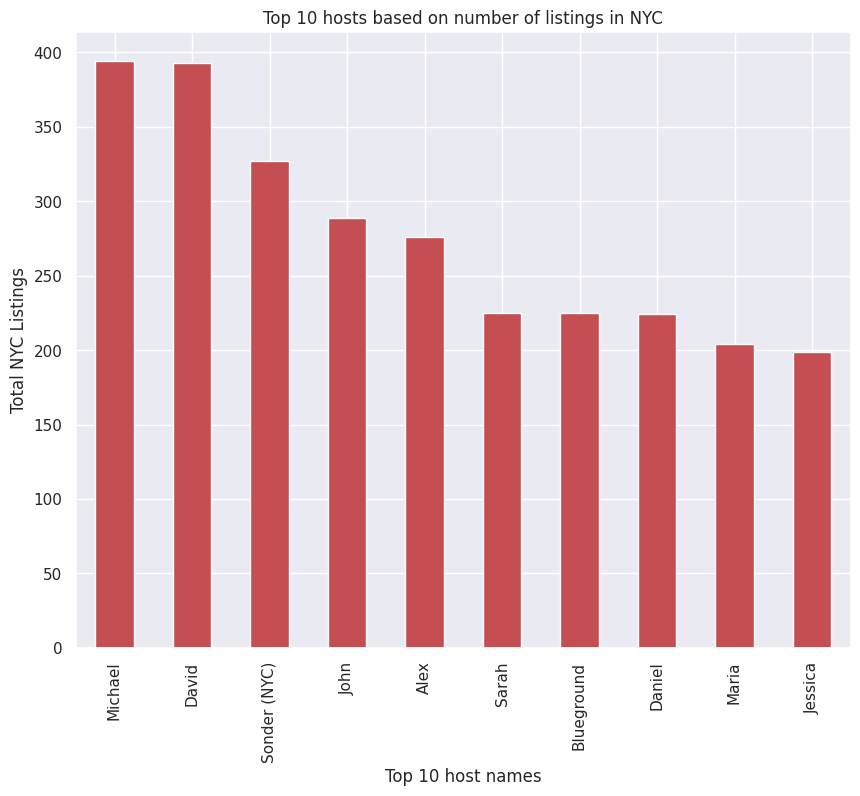

In [94]:
#Top 10 hostS in visualisation form
T10_hosts.plot(kind='bar',color='r')
plt.xlabel('Top 10 host names')
plt.ylabel('Total NYC Listings')
plt.title('Top 10 hosts based on number of listings in NYC')

### **Distribution of price before and after log transformation**

Text(0.5, 1.0, 'Price Distribution After Log Transformation')

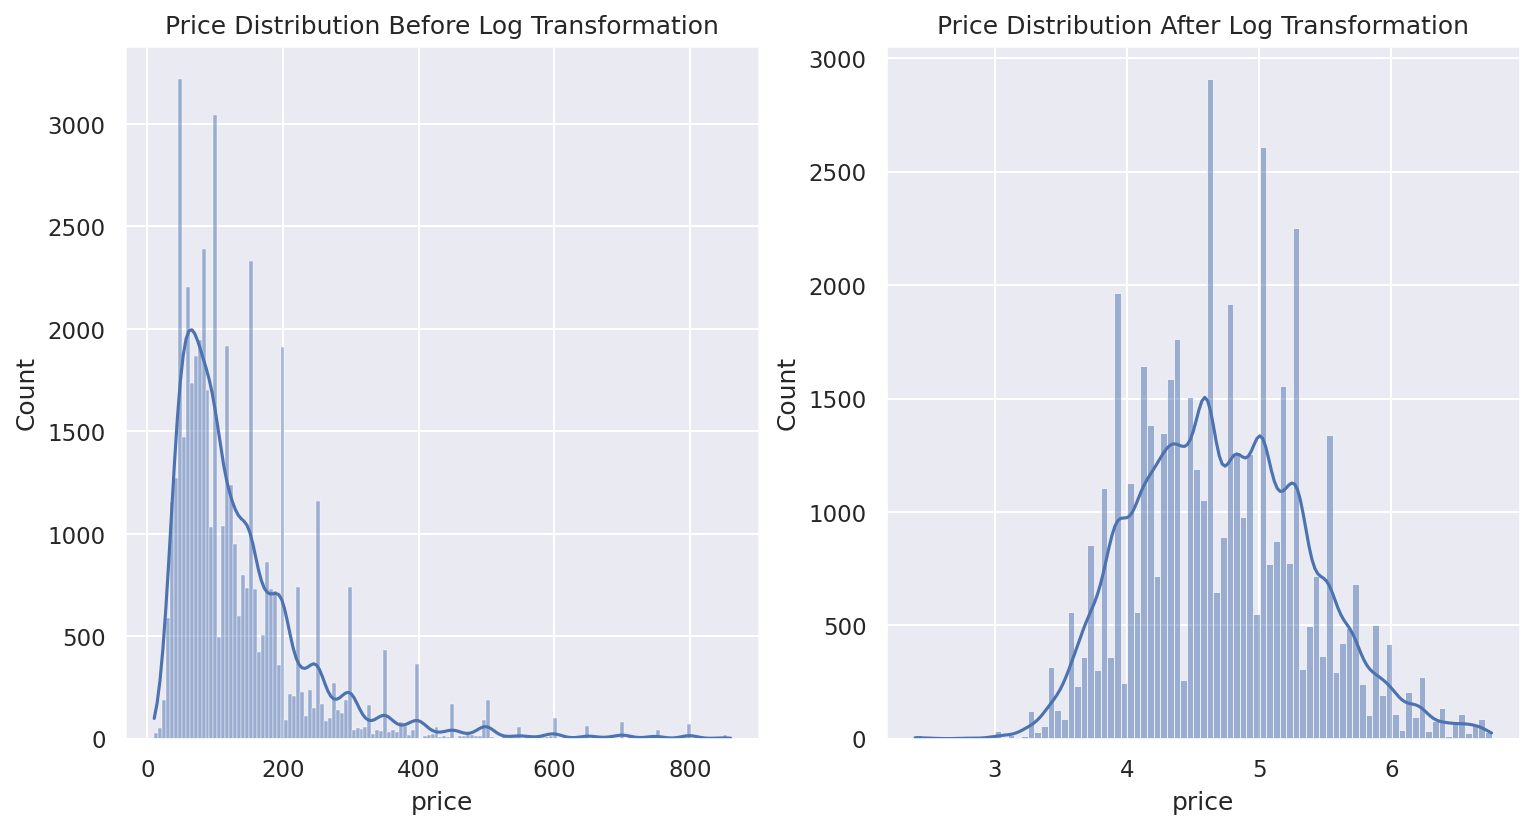

In [95]:
fig, ax = plt.subplots(1,2, figsize = (12,6), dpi=150)
sns.histplot(data=airbnb_ny_final, x="price", kde=True, ax=ax[0]).set_title("Price Distribution Before Log Transformation",size = 12)
sns.histplot(np.log1p(airbnb_ny_final.price), kde=True, ax=ax[1]).set_title("Price Distribution After Log Transformation",size = 12)

### **An interactive map distribution of Airbnb listings across different neighborhoods in New York City.**

In [96]:
import folium
from folium.plugins import MarkerCluster

# Creating a map centered around New York City
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
marker_cluster = MarkerCluster().add_to(ny_map)
for index, row in airbnb_ny_final.iterrows():
    popup_text = f"Neighborhood: {row['neighbourhood']}<br>Price: ${row['price']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster)

# Displaying the map
ny_map.save('neighborhood_distribution_map_with_price.html')

The html file is saved with markers indicating the location of each listing.

## **Dimension Reduction**

Performing PCA and plotting Explained Variance Ratio

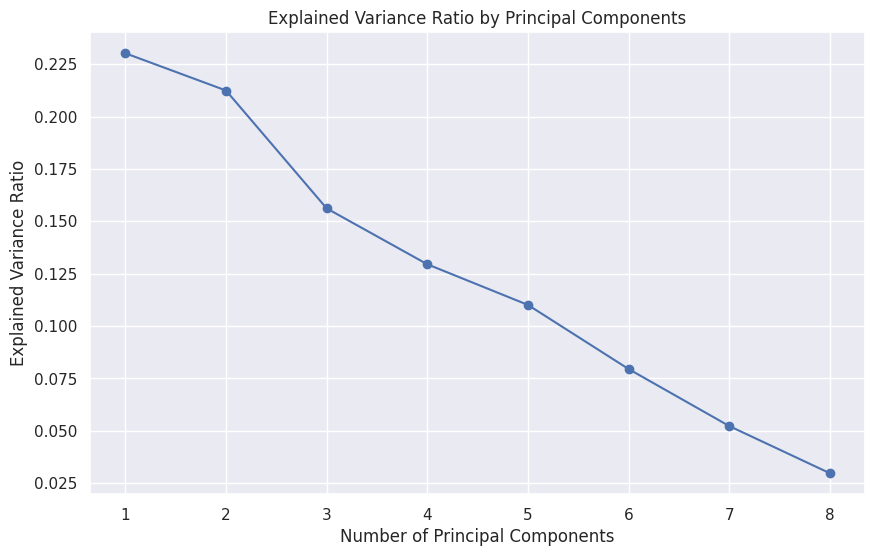

In [97]:
# Selecting numerical features
numerical_features = airbnb_ny_final.select_dtypes(include=['int64', 'float64']).dropna(axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [98]:
# Cumulative variance ratio
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance Ratio:")
print(cumulative_variance_ratio)

Cumulative Explained Variance Ratio:
[0.23025791 0.44273003 0.59892247 0.72842945 0.83852439 0.91801159
 0.97027349 1.        ]


* The cumulative explained variance ratio shows that the first 5 principal components explain approximately 83.85% of the total variance in the data, and the first 7 principal components explain approximately 97.03% of the total variance.
* This suggests that a significant portion of the variability in the original dataset can be represented using a smaller number of principal components.

## **Model Exploration**

In [99]:
airbnb_ny_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48186 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    48186 non-null  int64  
 1   name                                  48186 non-null  object 
 2   host_id                               48186 non-null  int64  
 3   host_name                             48186 non-null  object 
 4   neighbourhood_group                   48186 non-null  object 
 5   neighbourhood                         48186 non-null  object 
 6   latitude                              48186 non-null  float64
 7   longitude                             48186 non-null  float64
 8   room_type                             48186 non-null  object 
 9   price                                 48186 non-null  int64  
 10  number_of_reviews                     48186 non-null  int64  
 11  reviews_per_month   

In [100]:
# Define feature columns
feature_columns = ["id", "name", "host_id", "host_name", "neighbourhood_group",
                   "neighbourhood", "latitude", "longitude", "room_type",
                   "number_of_reviews", "reviews_per_month", "availability_365",
                   "minimum_nights_group", "calculated_host_listings_count_group"]

# Create a new DataFrame with only the feature columns
X = airbnb_ny_final[feature_columns].copy()

# Display the first few rows of the new DataFrame
print(X.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  number_of_reviews  reviews_per_month  availability_365  \
0     Private room                  9               0.21      

**Encoding categorical variables**

## **Model Exploration & Data Mining Model**

### **Random Forest Model**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the data into features (X) and target variable (y)
X = airbnb_ny_final[['neighbourhood_group', 'neighbourhood', 'room_type', 'number_of_reviews',
                      'reviews_per_month', 'availability_365', 'minimum_nights_group',
                      'calculated_host_listings_count_group']]
y = airbnb_ny_final['price']

# Converting categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initializing the Random Forest model
rf_price = RandomForestRegressor()

# Training the model
rf_price.fit(X_train, y_train)

# Predicting on the validation set
y_pred_rf = rf_price.predict(X_val)

# Printing performance metrics
print("Mean Absolute Error:", mean_absolute_error(y_val, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_rf))
print("R-squared Score:", r2_score(y_val, y_pred_rf))

Mean Absolute Error: 50.27086893530535
Mean Squared Error: 7145.262637338343
R-squared Score: 0.3969876667541552


In [102]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Converting the regression problem to a classification problem
# by converting the 'price' values to binary labels
y_val_class = np.where(y_val > np.median(y_val), 1, 0)
y_pred_rf_class = np.where(y_pred_rf > np.median(y_val), 1, 0)

# Creating the confusion matrix
cm = confusion_matrix(y_val_class, y_pred_rf_class)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[2631  989]
 [ 341 3267]]


**ROC Curve - Random Forest Model**

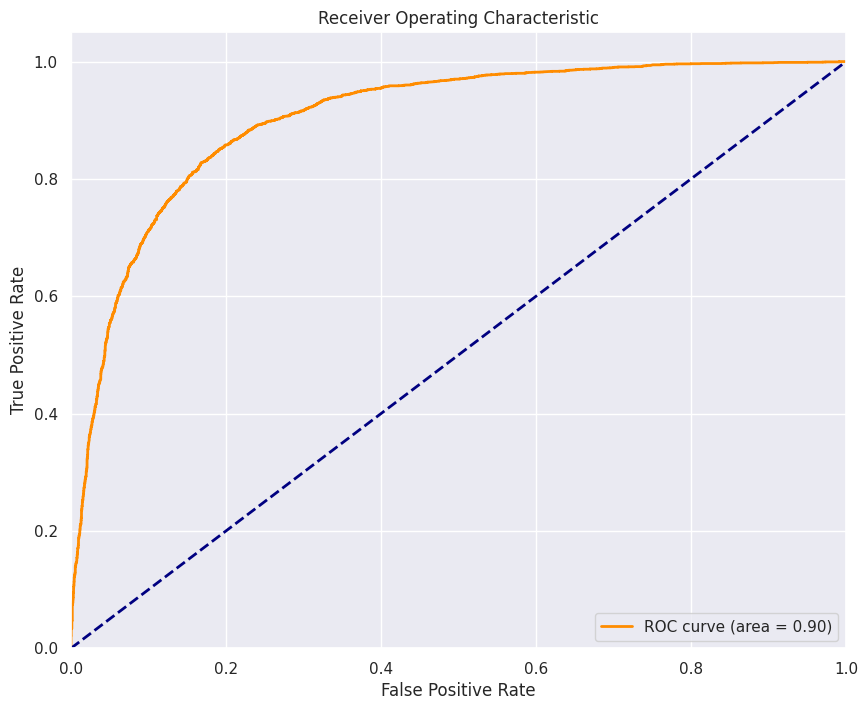

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val_class, y_pred_rf)

# Calculating the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### **K-NN Classifer**

In [104]:
from sklearn.neighbors import KNeighborsRegressor

# Initializing the K-NN model
knn_price = KNeighborsRegressor()

# Training the model
knn_price.fit(X_train, y_train)

# Predicting on the validation set
y_pred_knn = knn_price.predict(X_val)

# Printing performance metrics
print("Mean Absolute Error (K-NN):", mean_absolute_error(y_val, y_pred_knn))
print("Mean Squared Error (K-NN):", mean_squared_error(y_val, y_pred_knn))
print("R-squared Score (K-NN):", r2_score(y_val, y_pred_knn))

Mean Absolute Error (K-NN): 63.808937465412285
Mean Squared Error (K-NN): 9681.136330935253
R-squared Score (K-NN): 0.18297690320267657


In [105]:
# Converting the regression problem to a classification problem
# by converting the 'price' values to binary labels
y_pred_knn_class = np.where(y_pred_knn > np.median(y_val), 1, 0)

# Creating the confusion matrix
cm_knn = confusion_matrix(y_val_class, y_pred_knn_class)
print("Confusion Matrix (K-NN):")
print(cm_knn)

Confusion Matrix (K-NN):
[[1929 1691]
 [ 467 3141]]


**ROC Curve - KNN Classifer**

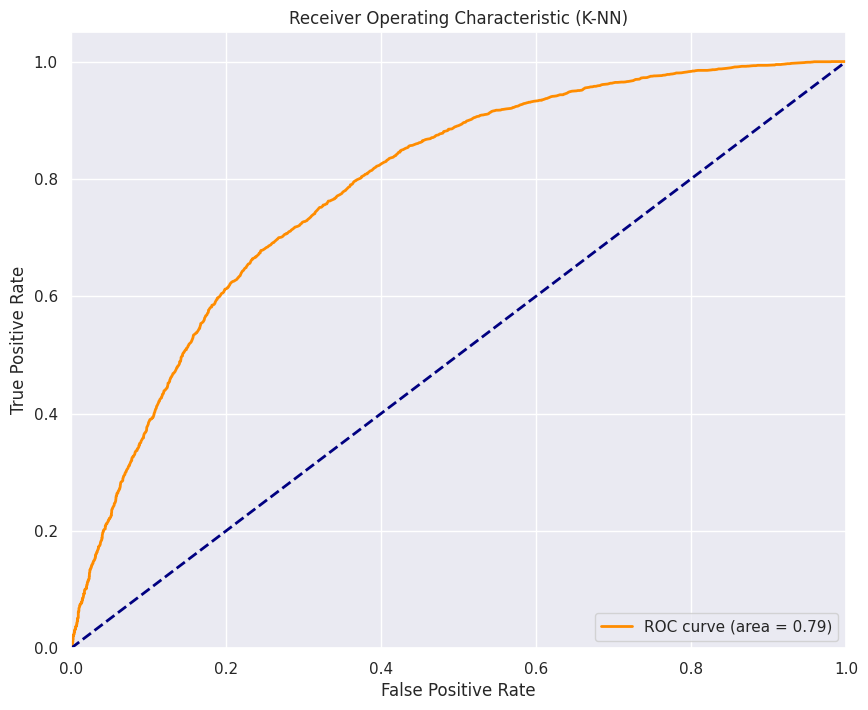

In [106]:
# Calculating the false positive rate, true positive rate, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val_class, y_pred_knn)

# Calculating the area under the ROC curve
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (K-NN)')
plt.legend(loc="lower right")
plt.show()

### **Decision Tree**

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_dt = dt_model.predict(X_val)

# Calculate the R-squared score
r2_dt = r2_score(y_val, y_pred_dt)

# Print the R-squared score
print("Mean Absolute Error (Decision Tree)", mean_absolute_error(y_val, y_pred_dt))
print("Mean Squared Error (Decision Tree)", mean_squared_error(y_val, y_pred_dt))
print("R-squared Score (Decision Tree):", r2_dt)

Mean Absolute Error (Decision Tree) 63.2816014616411
Mean Squared Error (Decision Tree) 11729.109078859517
R-squared Score (Decision Tree): 0.010141713255097051


In [108]:
# Converting the regression problem to a classification problem
# by converting the 'price' values to binary labels
y_pred_dt_class = np.where(y_pred_dt > np.median(y_val), 1, 0)

# Creating the confusion matrix
cm_dt = confusion_matrix(y_val_class, y_pred_dt_class)
print("Confusion Matrix (Decision Tree):")
print(cm_dt)

Confusion Matrix (Decision Tree):
[[2798  822]
 [ 768 2840]]


**ROC Curve - Decision Tree**

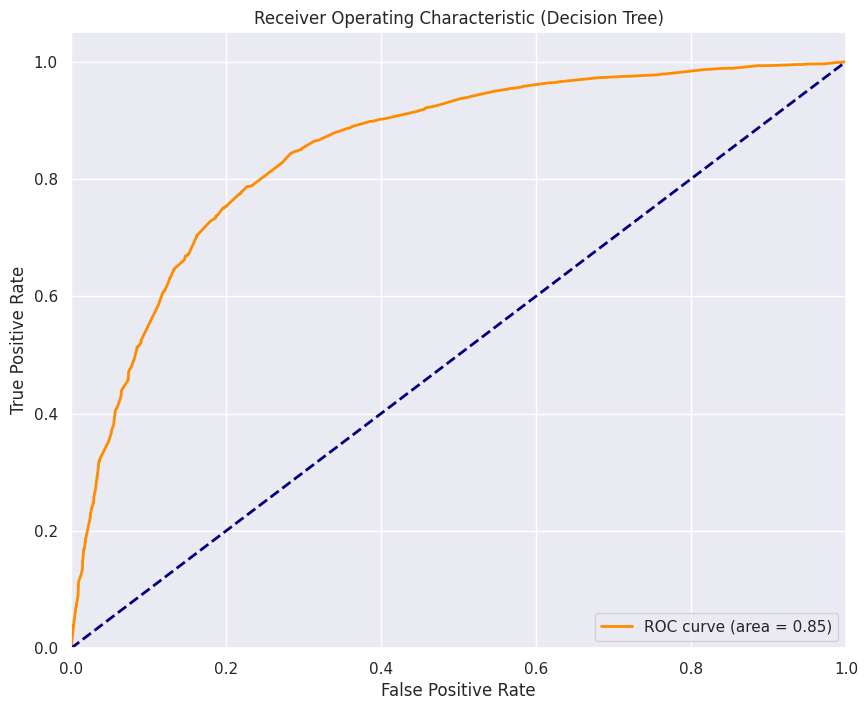

In [109]:
# Calculating the false positive rate, true positive rate, and thresholds
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val_class, y_pred_dt)

# Calculating the area under the ROC curve
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

### **Logistic Regression**

In [110]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lr = lr_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **XGBoost**

In [111]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Splitting the data into features (X) and target variable (y)
X = airbnb_ny_final[['neighbourhood_group', 'neighbourhood', 'room_type', 'number_of_reviews',
                      'reviews_per_month', 'availability_365', 'minimum_nights_group',
                      'calculated_host_listings_count_group']]
y = airbnb_ny_final['price']

# Converting categorical variables to one-hot encoding
X = pd.get_dummies(X)

# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initializing the XGBoost model
xgb_price = XGBRegressor()

# Training the model
xgb_price.fit(X_train, y_train)

# Predicting on the validation set
y_pred_xgb = xgb_price.predict(X_val)

# Printing performance metrics
print("Mean Absolute Error:", mean_absolute_error(y_val, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_val, y_pred_xgb))
print("R-squared Score:", r2_score(y_val, y_pred_xgb))

Mean Absolute Error: 48.49824180481641
Mean Squared Error: 6669.458880670684
R-squared Score: 0.4371423185896238


In [112]:
# Converting the regression problem to a classification problem
threshold = np.median(y_val)
y_val_class = np.where(y_val > threshold, 1, 0)
y_pred_xgb_class = np.where(y_pred_xgb > threshold, 1, 0)

# Creating the confusion matrix
cm_xgb = confusion_matrix(y_val_class, y_pred_xgb_class)
print("Confusion Matrix:")
print(cm_xgb)


Confusion Matrix:
[[2602 1018]
 [ 288 3320]]


**ROC Curve : XG-Boost**

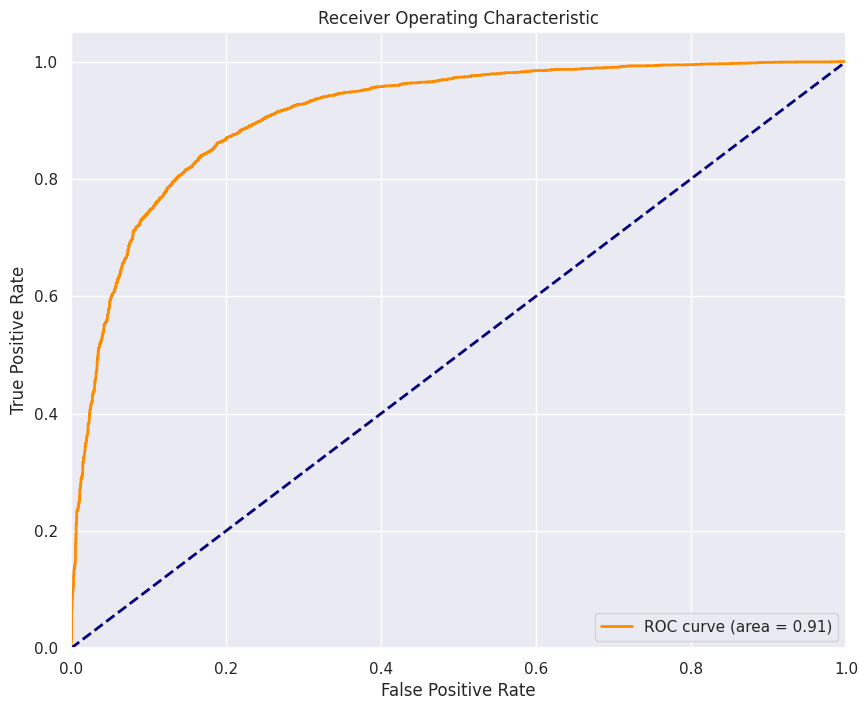

In [113]:
# Calculating the false positive rate, true positive rate, and thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val_class, y_pred_xgb)

# Calculating the area under the ROC curve
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Model Performance Evaluation**

In [114]:
# Dictionary to store performance metrics
performance_metrics = {
    'Model': ['K-NN Classifier', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Mean Absolute Error': [mean_absolute_error(y_val, y_pred_knn), mean_absolute_error(y_val, y_pred_dt),
                            mean_absolute_error(y_val, y_pred_lr), mean_absolute_error(y_val, y_pred_rf),
                            mean_absolute_error(y_val, y_pred_xgb)],
    'Mean Squared Error': [mean_squared_error(y_val, y_pred_knn), mean_squared_error(y_val, y_pred_dt),
                           mean_squared_error(y_val, y_pred_lr), mean_squared_error(y_val, y_pred_rf),
                           mean_squared_error(y_val, y_pred_xgb)],
    'R-squared': [r2_score(y_val, y_pred_knn), r2_score(y_val, y_pred_dt),
                        r2_score(y_val, y_pred_lr), r2_score(y_val, y_pred_rf),
                        r2_score(y_val, y_pred_xgb)]
}

# Performance dataframe
performance_df = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(performance_df)

                 Model  Mean Absolute Error  Mean Squared Error  R-squared
0      K-NN Classifier            63.808937         9681.136331   0.182977
1        Decision Tree            63.281601        11729.109079   0.010142
2  Logistic Regression            59.284726        10104.052020   0.147286
3        Random Forest            50.270869         7145.262637   0.396988
4              XGBoost            48.498242         6669.458881   0.437142


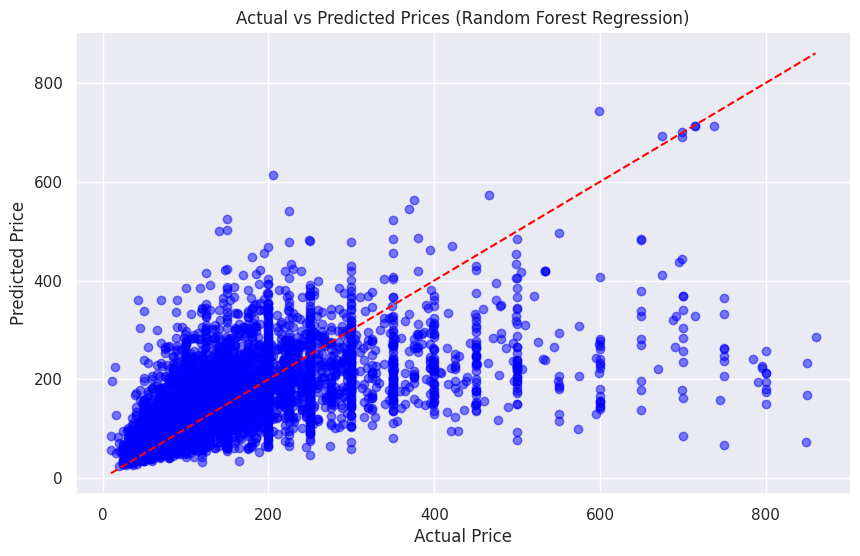

In [115]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
plt.title('Actual vs Predicted Prices (Random Forest Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [116]:
# Set the style of seaborn
sns.set_style("whitegrid")

### **Mean Absolute Error**

<ipython-input-117-1ce231e010f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='Mean Absolute Error', palette='coolwarm')


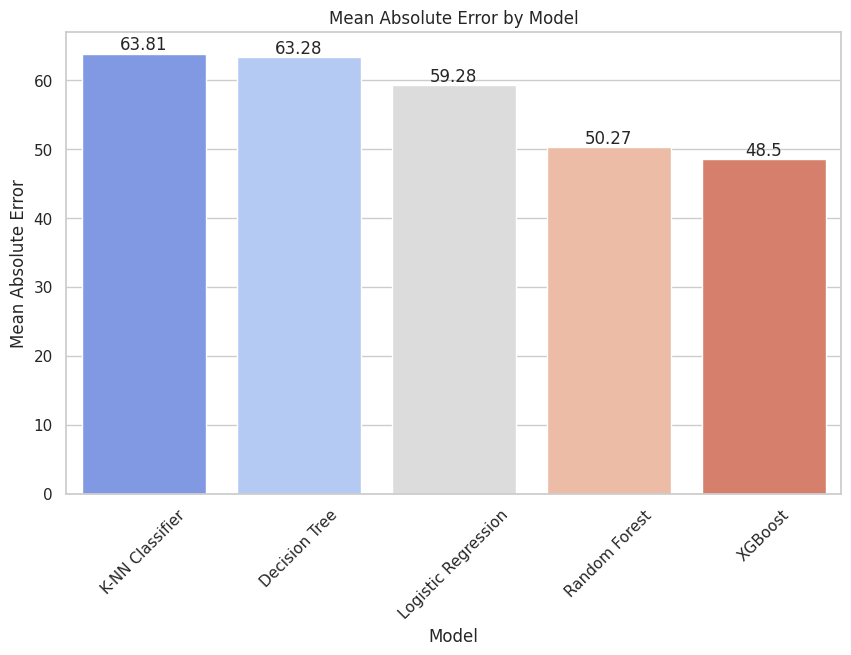

In [117]:
# Plot Mean Absolute Error
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Mean Absolute Error', palette='coolwarm')
plt.title('Mean Absolute Error by Model')
plt.xticks(rotation=45)
for index, value in enumerate(performance_df['Mean Absolute Error']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

### **Mean Squared Error**

<ipython-input-118-c26fcecf4c29>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='Mean Squared Error', palette='coolwarm')


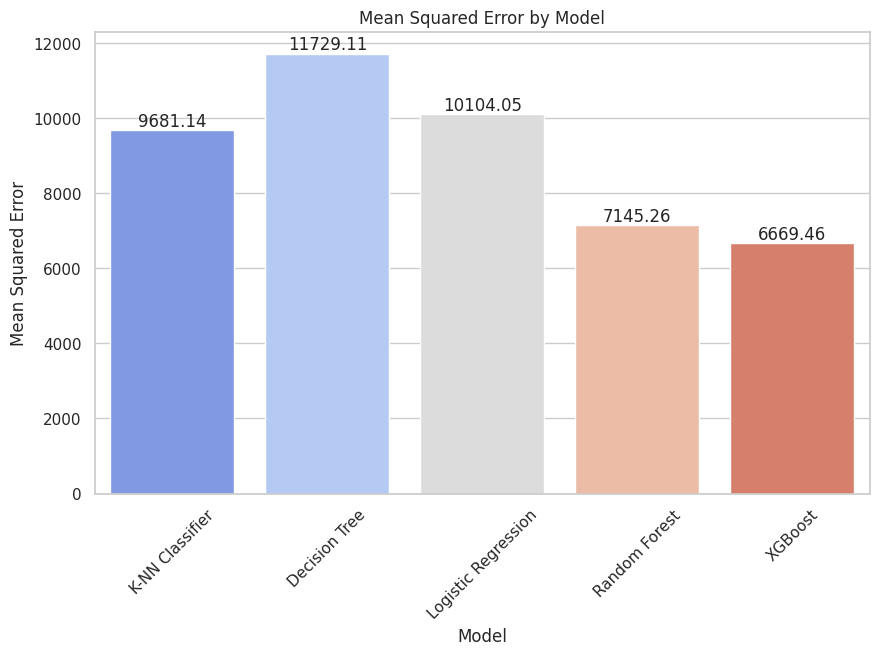

In [118]:
# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='Mean Squared Error', palette='coolwarm')
plt.title('Mean Squared Error by Model')
plt.xticks(rotation=45)
for index, value in enumerate(performance_df['Mean Squared Error']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

### **R-squared**

<ipython-input-119-340f8aebc218>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x='Model', y='R-squared', palette='coolwarm')


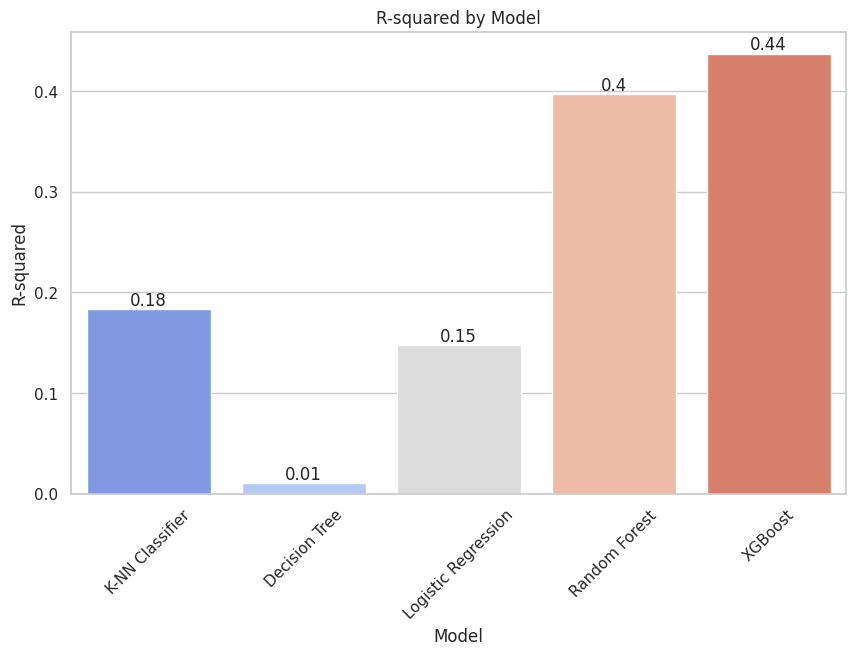

In [119]:
# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='Model', y='R-squared', palette='coolwarm')
plt.title('R-squared by Model')
plt.xticks(rotation=45)
for index, value in enumerate(performance_df['R-squared']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [120]:
!apt-get install -y wkhtmltopdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1 libsoup2.4-common libudev1
  libwacom-bin libwacom-common libwacom9 libwoff1 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libx

In [124]:
!jupyter nbconvert FinalProject_Code_Group19.ipynb --to html

[NbConvertApp] Converting notebook FinalProject_Code_Group19.ipynb to html
[NbConvertApp] Writing 3425881 bytes to FinalProject_Code_Group19.html


In [125]:
!wkhtmltopdf FinalProject_Code_Group19.html FinalProjectCode_Group19.pdf

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           
